In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F #library to use functions to train and model the meural networks
from torch.utils.data import Dataset,DataLoader
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

-for multiclass classification we will use RelU,we call this using torch.nn.functional.relu function

-for iris classification based on the features which will take 4 input features and give the classification between 3 types of iris so we have 4 input neurons,atleast one hidden layer and 3 output neurons

In [2]:
#model function
class Model(nn.Module):
    def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
    #we can take any arbitary number of neurons in h1 and h2
        super().__init__()#constructor which calls nn.module  
        self.fc1 =nn.Linear(in_features,h1)
        #fc1 is fully connected function which connects input layer and first hidden layer
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))#ReLU function of linearly connected layers
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [3]:
torch.manual_seed(32)
model = Model()

In [4]:
df = pd.read_csv("iris.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


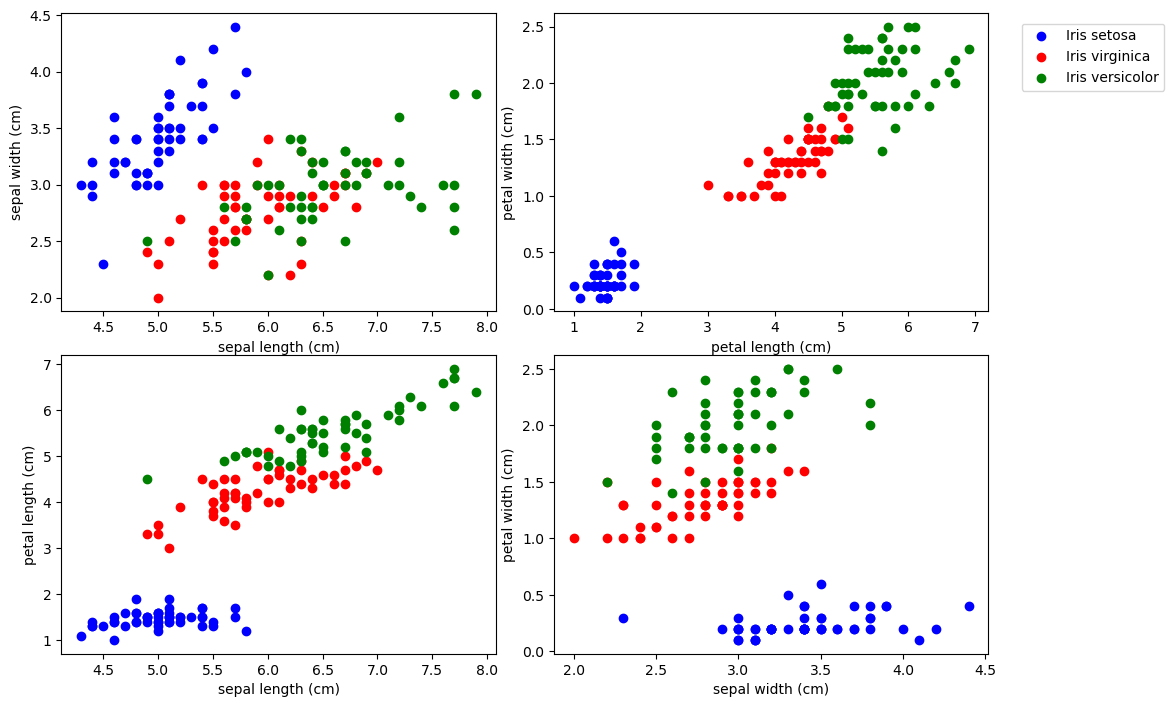

In [5]:
#plotting the data (need to learn it for visualization)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [6]:
X = df.drop('target',axis=1).values
y = df['target'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 33)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
#generally we need to one hot encode the targets using --> 
                                                        # y_train = F.one_hot(torch.LongTensor(y_train)) 
#but as the target is already in form 0.0 1.0 it is not needed
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

-Even though we dont need Dataset object and DataLoader tool for this dataset as this is very small sample,we can take advantage of it and load the data in two batches.

-Also even though we have already shuffled the data in test_train split we will again shuffle it so if we make multiple passes every time it models on random batches of data.

-it is not much benificial now but becomes very important in large datasets.

In [7]:
trainloader = DataLoader(X_train, batch_size=60, shuffle=True)
testloader = DataLoader(X_test, batch_size=60, shuffle=False)
#Although we wont use them 

In [8]:
criterion = nn.CrossEntropyLoss()#cost function which is used to optimize the model
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
#gradient descent optimizer with the learning rate of 0.01
epochs = 100
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())
    
    
    if i%10 == 0:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()#sets the gradient for next epoch iteration zero
    loss.backward()#back propogation
    optimizer.step()#updates the model parameters using the gradients computed in the backward pass

epoch: 10  loss: 0.95661819
epoch: 20  loss: 0.79237276
epoch: 30  loss: 0.63202888
epoch: 40  loss: 0.41852951
epoch: 50  loss: 0.26722968
epoch: 60  loss: 0.15835255
epoch: 70  loss: 0.10400636
epoch: 80  loss: 0.08255427
epoch: 90  loss: 0.07298816
epoch: 100  loss: 0.06756166


Text(0.5, 0, 'epoch')

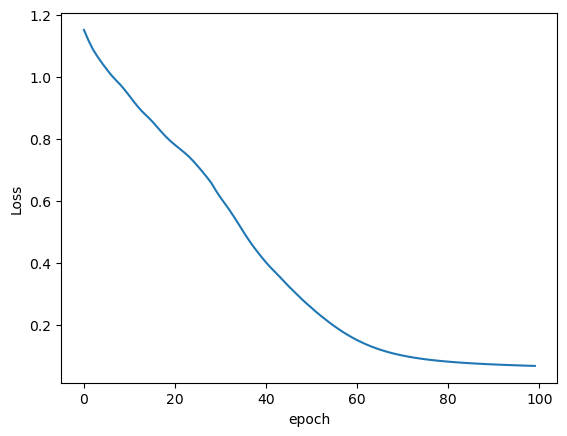

In [9]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
#loss function

In [10]:
#VALIDATING THE MODEL ON TEST DATA
with torch.no_grad():
#it gives the context to the given block of code that gradient is not to be calculated for the test set
    y_val = model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.05809893


In [11]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1:2}. {str(y_val):38}  {y_test[i]}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')
#the tensor arg which has the max value is the predicted category 

 1. tensor([-2.1252,  4.8064, -0.8628])     1
 2. tensor([-1.7985,  5.3098, -1.5449])     1
 3. tensor([  6.3542,   0.8438, -10.0541])  0
 4. tensor([-3.9123,  4.5958,  1.1693])     1
 5. tensor([-7.4713,  3.2021,  5.7853])     2
 6. tensor([-10.4976,   1.6459,   9.6297])  2
 7. tensor([  6.3201,   0.9917, -10.1532])  0
 8. tensor([  7.0468,   0.7059, -10.9137])  0
 9. tensor([-7.2061,  3.3477,  5.3565])     2
10. tensor([-9.3960,  2.5759,  8.1033])     2
11. tensor([-9.8807,  2.3475,  8.7141])     2
12. tensor([ 6.2748,  0.6655, -9.7613])     0
13. tensor([-9.3142,  2.1880,  8.1947])     2
14. tensor([-3.7803,  4.5050,  1.0752])     1
15. tensor([-7.8657,  3.0117,  6.2303])     2
16. tensor([-1.8867,  5.1572, -1.3345])     1
17. tensor([-5.7006,  3.5030,  3.6696])     2
18. tensor([  7.1789,   0.7369, -11.1350])  0
19. tensor([-3.2944,  4.7931,  0.3475])     1
20. tensor([-7.7665,  3.7629,  5.7095])     2
21. tensor([  6.6499,   0.7889, -10.4252])  0
22. tensor([  7.4357,   0.8918, -1

In [12]:
model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)